# ENM375 Midterm Project
---
Name: Aprupa Alahari

Pennkey: 21557860


## 3  Preparing the Data for Analysis

### Q1  Choosing the Appropriate Data Structure

#### Data Science Portion:

In [0]:
# import packages

import sys
import os
import numpy as np
import h5py
import matplotlib.pyplot as pyplot
import scipy.io as sio
from scipy import stats
import seaborn as sns
import networkx as nx
import pandas as pd
from math import factorial as f
import glob
import random
from scipy.stats import chisquare
import math
import bct

# gathering messy phenotypic data
df = pd.read_csv("KNOTData_phenotypic_messy.csv")
display(df)

# directory of python file and data files
basedir = r"C:/Users/aprup/Documents/Classes - Spring 2020/ENM 375/Midterm Project/"
folders = os.listdir("KNOTData_processed")
fold = "KNOTData_processed/"
specific = "/PossibleNetwork.txt"

# we see that the last two elements of the list of folders; we want to remove KNOTData_phenotypic_messy.csv and __MACOSX
res = folders[: len(folders) - 2] 
#print(res) # folders for each PossibleNetwork.txt file

networks = []
for subjectID in res:
    subjectNetwork = np.loadtxt(basedir + fold + subjectID + specific)
    networks.append(subjectNetwork)
# print(len(networks)) # check to see that we have appropriately loaded the networks

,ID,AgeYears,GenderFactor,EducDeg,Income,JE_5D,DS_5D,ST_5D_R,SC_5D,TS_5D,LSMean
0,101,23.27945,0,BachDegree,20to49k,4.4,4.25,4.4,2.8,2.00,4.0
1,104,30.84384,0,BachDegree,under20k,3.2,2.50,3.6,4.0,0.00,6.0
2,105,31.26849,0,Master,150to199k,3.0,3.00,3.0,2.4,1.00,6.0
3,106,25.99452,0,BachDegree,100to149k,5.6,3.50,4.6,5.2,1.25,5.6
4,107,65.23562,0,Master,50to74k,3.4,2.75,3.5,2.4,0.75,3.6
...,...,...,...,...,...,...,...,...,...,...,...
144,353,24.70959,1,BachDegree,PreferNotToAnswer,4.0,3.20,1.2,4.4,2.40,5.0
145,355,27.08493,0,Master,20to49k,4.6,3.20,2.8,4.8,1.00,4.6
146,356,22.19178,0,BachDegree,100to149k,4.6,4.40,4.6,4.2,3.00,4.6
147,359,-10.00000,0,NaN,NaN,5.6,5.00,4.2,5.8,4.40,4.4


#### Essay Portion:

I chose to organize the phenotypic data in a Dataframe, which has labeled columns for each data set per subject. I organized the potential knowledge network matrices into a list of each network, which includes the information from the corresponding text file for each subject. Using these organizations, I can separate the information for each subject. 

JCA:

+1 import phenotypic data correctly

+1 import network data correctly

+0.5 working code

+0.5 commented code

+1 essay question correct


### Q2  Examining the Data

#### Data Science Portion:

In [0]:
# creating variables for each category of the data
ages = df['AgeYears']
gender = df['GenderFactor']
education = df['EducDeg']
income = df['Income']
joyExp = df['JE_5D']
depSens = df['DS_5D']
stressTol = df['ST_5D_R']
socCur = df['SC_5D']
thrillSeek = df['TS_5D']
lifeSat = df['LSMean']

# collecting ranges
# print('Ages Range: ', min(ages), 'to', max(ages))
# print('Joy Exploration Range: ', min(joyExp), 'to', max(joyExp))
# print('Deprivation Sensitivity Range: ', min(depSens), 'to', max(depSens))
# print('Stress Tolerance Range: ', min(stressTol), 'to', max(stressTol))
# print('Social Curiosity Range: ', min(socCur), 'to', max(socCur))
# print('Thrill Seeking Range: ', min(thrillSeek), 'to', max(thrillSeek))
# print('Life Satisfaction Range: ', min(lifeSat), 'to', max(lifeSat))

# gathering number of categories for Gender, Education, and Income
genderCategories = pd.unique(df['GenderFactor'])
educationCategories = pd.unique(df['EducDeg'])
incomeCategories = pd.unique(df['Income'])

# List of tuples
rangesCategories = [(min(ages), max(ages), 'N/A'),
(min(joyExp), max(joyExp), 'N/A'),
(min(depSens), max(depSens), 'N/A'),
(min(socCur), max(socCur), 'N/A'),
(min(thrillSeek), max(thrillSeek), 'N/A'),
(min(lifeSat), max(lifeSat), 'N/A'),
('N/A', 'N/A', len(genderCategories)),
('N/A', 'N/A', len(educationCategories)),
('N/A', 'N/A', len(incomeCategories))]

# creating table
tableRangesCategories = pd.DataFrame(rangesCategories, columns = ["Minimum", "Maximum", "Number of Categories"], index=['Age', 'Joyous Exploration', 'Deprivation Sensitivity', 'Stress Tolerance', 'Thrill Seeking', 'Life Satisfaction', 'Gender', 'Education', 'Income'])
display(tableRangesCategories)

,Minimum,Maximum,Number of Categories
Age,-10,65.2356,N/A
Joyous Exploration,-3,6,N/A
Deprivation Sensitivity,-3,5.8,N/A
Stress Tolerance,0,10,N/A
Thrill Seeking,0,10,N/A
Life Satisfaction,1,7,N/A
Gender,N/A,N/A,3
Education,N/A,N/A,7
Income,N/A,N/A,9


#### Essay Portion:

Ages Range: -10.0 to 65.23562

Joy Exploration Range: -3.0 to 6.0

Deprivation Sensitivity Range: -3.0 to 5.8

Stress Tolerance Range: 0.4 to 6.0

Social Curiosity Range: 0.0 to 10.0

Thrill Seeking Range: 0.0 to 10.0

Life Satisfaction Range: 1.0 to 7.0

Number of Categories for Gender: 3

Number of Categories for Education: 7

Number of Categories for Income: 9

When comparing the number of categories to the givens, we see that Education and Income each have one extra category. We also see that the range of ages, joyous exploration, social curiosity, and thrill seeking all seem to exceed their respective given ranges.

JCA:

+1 get numeric range correctly

+1 get categories correctly

+0.5 working code

+0.5 commented code

+1 essay question correct


### Q3  Visualizing the Raw Data

#### Data Science Portion:

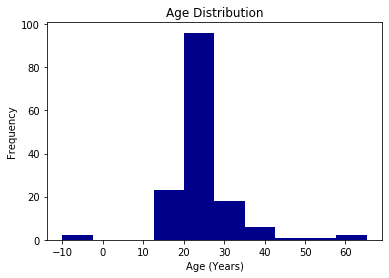

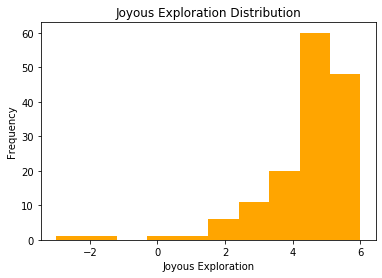

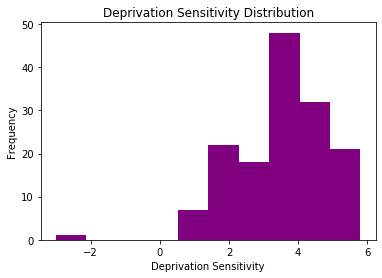

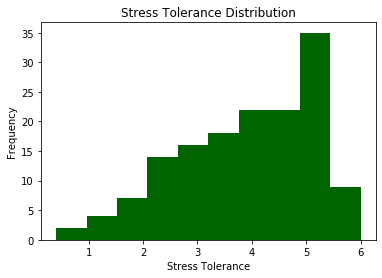

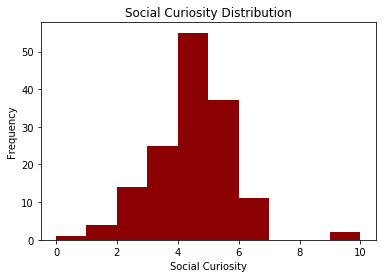

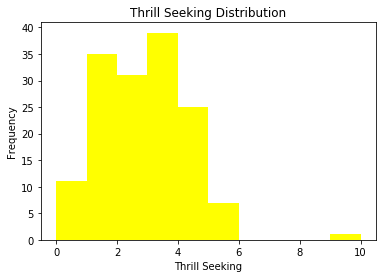

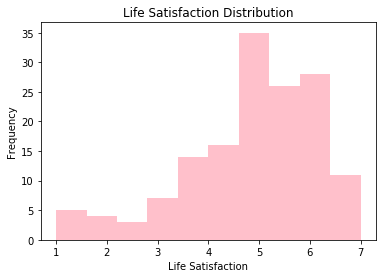

In [0]:
ax = df.hist(['AgeYears'], grid = False, color='DarkBlue')
ax = ax[0]
for x in ax:
    x.set_xlabel("Age (Years)")
    x.set_ylabel("Frequency")
    x.set_title("Age Distribution")
    
ax = df.hist(['JE_5D'], grid = False, color='Orange')
ax = ax[0]
for x in ax:
    x.set_xlabel("Joyous Exploration")
    x.set_ylabel("Frequency")
    x.set_title("Joyous Exploration Distribution")
    
ax = df.hist(['DS_5D'], grid = False, color='Purple')
ax = ax[0]
for x in ax:
    x.set_xlabel("Deprivation Sensitivity")
    x.set_ylabel("Frequency")
    x.set_title("Deprivation Sensitivity Distribution")
    
ax = df.hist(['ST_5D_R'], grid = False, color='DarkGreen')
ax = ax[0]
for x in ax:
    x.set_xlabel("Stress Tolerance")
    x.set_ylabel("Frequency")
    x.set_title("Stress Tolerance Distribution")
    
ax = df.hist(['SC_5D'], grid = False, color='DarkRed')
ax = ax[0]
for x in ax:
    x.set_xlabel("Social Curiosity")
    x.set_ylabel("Frequency")
    x.set_title("Social Curiosity Distribution")
    
ax = df.hist(['TS_5D'], grid = False, color='Yellow')
ax = ax[0]
for x in ax:
    x.set_xlabel("Thrill Seeking")
    x.set_ylabel("Frequency")
    x.set_title("Thrill Seeking Distribution")
    
ax = df.hist(['LSMean'], grid = False, color='Pink')
ax = ax[0]
for x in ax:
    x.set_xlabel("Life Satisfaction")
    x.set_ylabel("Frequency")
    x.set_title("Life Satisfaction Distribution")

#### Essay Portion:

There are a few things to note about the histograms above. I will describe these specific to each histogram.

1) Age: This histogram is unimodal and seems to have no skew. However, we do see that there are some values which are negative, which is not expected for "age," which leads me to believe that there are some mistakes in the data. There are also values which exist outside of the given range, which should not be considered. I used the Sturges rule.

2) Joyous Exploration: This histogram is also unimodal and has a strong left skew. It also has some negative values, which are outside of the given range. I used the Sturges rule. This bin size illustrates the data well, and makes it clear that the negative values is separate and possibly a mistake.

3) Deprivation Sensitivity: This histogram is also unimodal, but with a weaker left skew than Joyous Exploration. It also seems to have some negative values, which are outside of the given range. I used the Sturges rule. This bin size illustrates the data well, and makes it clear that the negative values is separate and possibly a mistake.

4) Stress Tolerance: This histogram is unimodal, but with relatively weaker left skew. All of the values seem to be within the given range. I used the Sturges rule. This bin size illustrates the data well because it allows us to visualize the trends in the data.

5) Social Curiosity: This histogram is unimodal with a strong left skew. There is a value outside of the given range, which leads me to believe that it is an error. I used the Sturges rule. This bin size illustrates the data well because it appropriately describes the data's distribution, and distinctly shows the value in the data that is out of the given range.

6) Thrill Seeking: This histogram is unimodal with no skew. It is clear to see that there is a value outside of the given range, which leads me to believe that it is an error. I used the Sturges rule. This bin size illustrates the data well because it appropriately describes the data's distribution, and distinctly shows the value in the data that is out of the given range.

7) Life Satisfaction: This histogram is unimodal with a left skew. There do seem to be some data values outside of the given range, which leads me to believe that it is an error. I used the Sturges rule. This bin size illustrates the data well because it appropriately describes the data's distribution, and shows the value in the data that is out of the given range.

For all of the histograms I created, I chose varied numbers of bin sizes until I landed at a bin size that distincly and effectively illustrated high incidence, which was dependent on the ability to group the data, as well as ability to see the differentiation. I used the Sturges rule.

JCA: 

+1 clearly labeled axes, title/legend (+0.5 each)

+2 histograms plotted

+1 appropriate number of bins chosen (5 or more)

+0.5 working code

+0.5 commented code

+2 correct essay



### Q4  Fixing the Messy Data

#### Data Science Portion:

In [0]:
# filtering out unwanted code
df = df.loc[(df['AgeYears']>=18.2137) & (df['AgeYears'] <= 65.23562)]
df = df.loc[(df['JE_5D']>=0) & (df['JE_5D'] <= 6)]
df = df.loc[(df['DS_5D']>=0) & (df['DS_5D'] <= 6)]
df = df.loc[(df['ST_5D_R']>=0) & (df['ST_5D_R'] <= 6)]
df = df.loc[(df['SC_5D']>=0) & (df['SC_5D'] <= 6)]
df = df.loc[(df['TS_5D']>=0) & (df['TS_5D'] <= 6)]
df = df.loc[(df['LSMean']>=1) & (df['LSMean'] <= 7)]
df = df.loc[(df['LSMean']>=1) & (df['LSMean'] <= 7)]
df = df.loc[(df['LSMean']>=1) & (df['LSMean'] <= 7)]
subset = []
df = df.dropna()
cleandf = df # cleaned DataFrame
display(cleandf)

IDlist = cleandf['ID'].tolist()
# print(IDlist)
IDlistStrings = [str(item) for item in IDlist]
# print(IDlistStrings)

# directory of python file and data files
basedir = r"C:/Users/aprup/Documents/Classes - Spring 2020/ENM 375/Midterm Project/"
folders = os.listdir("KNOTData_processed")
fold = "KNOTData_processed/"
specific = "/PossibleNetwork.txt"

cleanNetworks = []
for i in IDlistStrings:
    cleanSubjectNetwork = np.loadtxt(basedir + fold + i + specific)
    cleanNetworks.append(cleanSubjectNetwork)
# print(len(cleanNetworks)) # check to see that we have appropriately loaded the networks; since 141 is less than original 149, we see that the invalid data was removed successfully

,ID,AgeYears,GenderFactor,EducDeg,Income,JE_5D,DS_5D,ST_5D_R,SC_5D,TS_5D,LSMean
0,101,23.279450,0,BachDegree,20to49k,4.4,4.25,4.4,2.8,2.00,4.0
1,104,30.843840,0,BachDegree,under20k,3.2,2.50,3.6,4.0,0.00,6.0
2,105,31.268490,0,Master,150to199k,3.0,3.00,3.0,2.4,1.00,6.0
3,106,25.994520,0,BachDegree,100to149k,5.6,3.50,4.6,5.2,1.25,5.6
4,107,65.235620,0,Master,50to74k,3.4,2.75,3.5,2.4,0.75,3.6
...,...,...,...,...,...,...,...,...,...,...,...
143,351,31.038356,0,Master,50to74k,5.8,4.60,5.0,6.0,4.80,4.8
144,353,24.709590,1,BachDegree,PreferNotToAnswer,4.0,3.20,1.2,4.4,2.40,5.0
145,355,27.084930,0,Master,20to49k,4.6,3.20,2.8,4.8,1.00,4.6
146,356,22.191780,0,BachDegree,100to149k,4.6,4.40,4.6,4.2,3.00,4.6


#### Essay Portion:

Seeing that our new DataFrame has 140 rows, this means that we eliminated 149 - 140 = 9 subjects from the original DataFrame. The total number of subjects remaining is 140.

JCA:

+2 filter out nan

+2 filter out infeasible values (out of range)

+0.5 working code

+0.5 commented code

+1 essay question correct (+0.5 for each)


### Q5  Data Transformation

#### Data Science Portion:

In [0]:
dfIncome = cleandf['Income']

# display(dfIncome) # making sure we got the correct column
dfIncome = dfIncome.replace(to_replace='PreferNotToAnswer', value=0)
dfIncome = dfIncome.replace(to_replace='under20k', value=1)
dfIncome = dfIncome.replace(to_replace='20to49k', value=2)
dfIncome = dfIncome.replace(to_replace='50to74k', value=3)
dfIncome = dfIncome.replace(to_replace='75to99k', value=4)
dfIncome = dfIncome.replace(to_replace='100to149k', value=5)
dfIncome = dfIncome.replace(to_replace='150to199k', value=6)
dfIncome = dfIncome.replace(to_replace='200andup', value=7)
IncomeNumbs = dfIncome
# display(dfIncome) # making sure all became numbers

df['Income'] = IncomeNumbs
# display(df) # checking to make sure we numerized Income

# adding a column which displays average of the five curiosity scales
df['Avg_5D'] = (df['JE_5D'] + df['DS_5D'] + df['ST_5D_R'] + df['SC_5D'] + df['TS_5D'])/5
display(df)

,ID,AgeYears,GenderFactor,EducDeg,Income,JE_5D,DS_5D,ST_5D_R,SC_5D,TS_5D,LSMean,Avg_5D
0,101,23.279450,0,BachDegree,2,4.4,4.25,4.4,2.8,2.00,4.0,3.57
1,104,30.843840,0,BachDegree,1,3.2,2.50,3.6,4.0,0.00,6.0,2.66
2,105,31.268490,0,Master,6,3.0,3.00,3.0,2.4,1.00,6.0,2.48
3,106,25.994520,0,BachDegree,5,5.6,3.50,4.6,5.2,1.25,5.6,4.03
4,107,65.235620,0,Master,3,3.4,2.75,3.5,2.4,0.75,3.6,2.56
...,...,...,...,...,...,...,...,...,...,...,...,...
143,351,31.038356,0,Master,3,5.8,4.60,5.0,6.0,4.80,4.8,5.24
144,353,24.709590,1,BachDegree,0,4.0,3.20,1.2,4.4,2.40,5.0,3.04
145,355,27.084930,0,Master,2,4.6,3.20,2.8,4.8,1.00,4.6,3.28
146,356,22.191780,0,BachDegree,5,4.6,4.40,4.6,4.2,3.00,4.6,4.16


#### Essay Portion:

This step of converting the Income data into numbers will allow us to work numerically. Using categories for things like Education and Gender makes sense, but Income is quantifiable data. Transforming this data will allow us to use mathematic tools on this data.

JCA:

+2 mapping income to numeric values

+1 correct calculation

+0.5 working code

+0.5 commented code

+1 essay question correct


## 4  Data Analysis

### Q6  The Histogram

#### Data Science Portion:

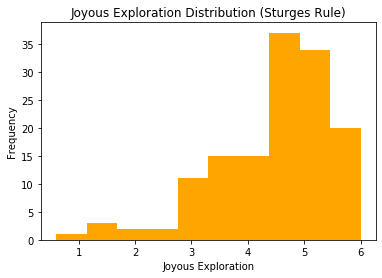

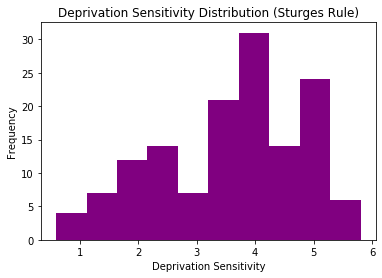

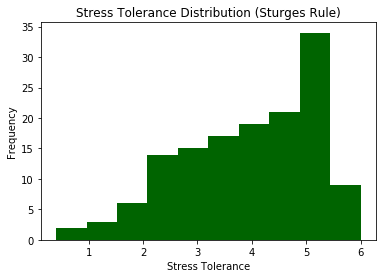

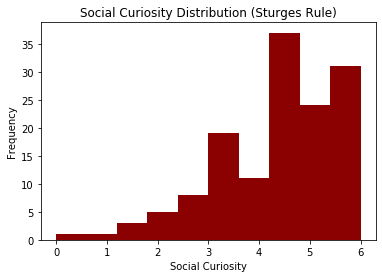

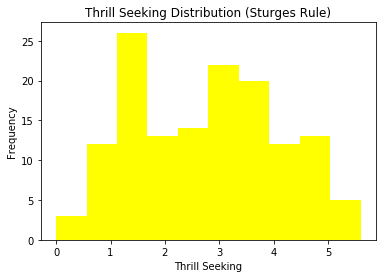

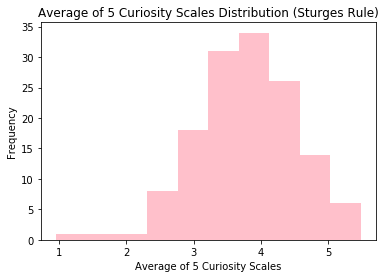

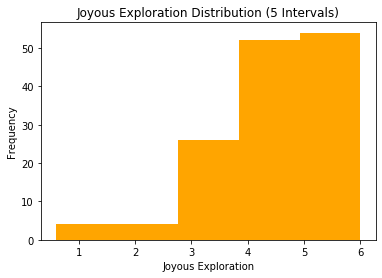

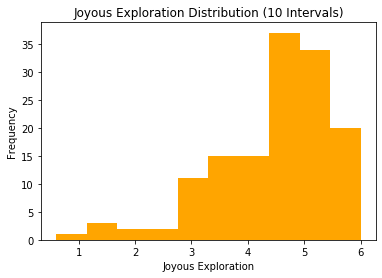

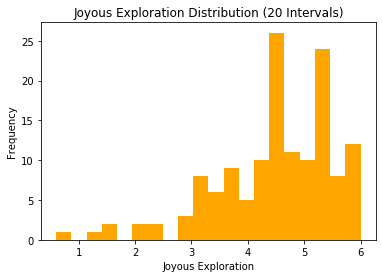

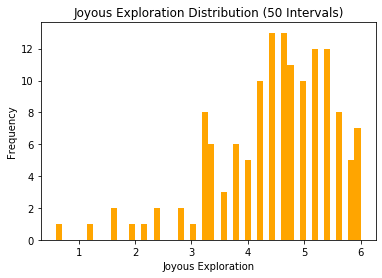

In [0]:
ax = df.hist(['JE_5D'], grid = False, color='Orange')
ax = ax[0]
for x in ax:
    x.set_xlabel("Joyous Exploration")
    x.set_ylabel("Frequency")
    x.set_title("Joyous Exploration Distribution (Sturges Rule)")
    
ax = df.hist(['DS_5D'], grid = False, color='Purple')
ax = ax[0]
for x in ax:
    x.set_xlabel("Deprivation Sensitivity")
    x.set_ylabel("Frequency")
    x.set_title("Deprivation Sensitivity Distribution (Sturges Rule)")
    
ax = df.hist(['ST_5D_R'], grid = False, color='DarkGreen')
ax = ax[0]
for x in ax:
    x.set_xlabel("Stress Tolerance")
    x.set_ylabel("Frequency")
    x.set_title("Stress Tolerance Distribution (Sturges Rule)")
    
ax = df.hist(['SC_5D'], grid = False, color='DarkRed')
ax = ax[0]
for x in ax:
    x.set_xlabel("Social Curiosity")
    x.set_ylabel("Frequency")
    x.set_title("Social Curiosity Distribution (Sturges Rule)")
    
ax = df.hist(['TS_5D'], grid = False, color='Yellow')
ax = ax[0]
for x in ax:
    x.set_xlabel("Thrill Seeking")
    x.set_ylabel("Frequency")
    x.set_title("Thrill Seeking Distribution (Sturges Rule)")
    
ax = df.hist(['Avg_5D'], grid = False, color='Pink')
ax = ax[0]
for x in ax:
    x.set_xlabel("Average of 5 Curiosity Scales")
    x.set_ylabel("Frequency")
    x.set_title("Average of 5 Curiosity Scales Distribution (Sturges Rule)")
    
# 5 intervals Joyous Exploration
ax = df.hist(['JE_5D'], grid = False, bins = 5, color='Orange')
ax = ax[0]
for x in ax:
    x.set_xlabel("Joyous Exploration")
    x.set_ylabel("Frequency")
    x.set_title("Joyous Exploration Distribution (5 Intervals)")
    
# 10 intervals Joyous Exploration
ax = df.hist(['JE_5D'], grid = False, bins = 10, color='Orange')
ax = ax[0]
for x in ax:
    x.set_xlabel("Joyous Exploration")
    x.set_ylabel("Frequency")
    x.set_title("Joyous Exploration Distribution (10 Intervals)")
    
# 20 intervals Joyous Exploration
ax = df.hist(['JE_5D'], grid = False, bins = 20, color='Orange')
ax = ax[0]
for x in ax:
    x.set_xlabel("Joyous Exploration")
    x.set_ylabel("Frequency")
    x.set_title("Joyous Exploration Distribution (20 Intervals)")
    
# 50 intervals Joyous Exploration
ax = df.hist(['JE_5D'], grid = False, bins = 50, color='Orange')
ax = ax[0]
for x in ax:
    x.set_xlabel("Joyous Exploration")
    x.set_ylabel("Frequency")
    x.set_title("Joyous Exploration Distribution (50 Intervals)")
    


#### Essay Portion:

The histogram for Joyous Exploration is unimodal with a left skew. The histogram for Deprivation Sensitivity is unimodal with no evident skew. The histogram for Stress Tolerance is unimodal with a strong left skew. The histogram for Social Curiosity is unimodal with a strong left skew. The histogram for Thrill Seeking is bimodal. The histogram for the Average of 5 Curiosity Scales is unimodal with a very slight left skew.

The shapes of these histograms may change with varying the number of intervals because the distinctness and determinability of the data will be directly affected, as well as the cleanliness of the intervals.

My preferred number of intervals is 10 intervals.

JCA: 

+1 clearly labeled axes, title/legend (+0.5 each)

+2 histograms plotted

+1.5 draw histograms of favorite measure with different bins

+0.5 working code

+0 code not commented

+2.5  essay portion (+1 describe the shape of histograms - modality, skew, range, etc., +1 describe the change with different intervals, +0.5 prefered number of intervals)


### Q7  The Box Plot

#### Data Science Portion:

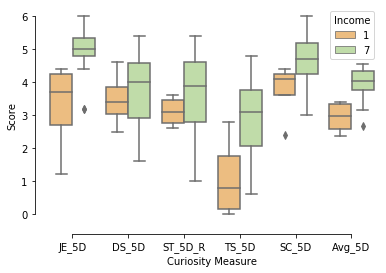

In [0]:
dataBoxPlot = df[df["Income"].isin([1,7])]
counts = ["JE_5D","DS_5D","ST_5D_R","TS_5D","SC_5D","Avg_5D",]
newData=pd.melt(dataBoxPlot, id_vars = ["Income"], value_vars = counts, var_name = 'Curiosity Measure', value_name = 'Score')
sns.boxplot(x = "Curiosity Measure", y = "Score", hue = 'Income', data = newData, palette ='Spectral')
sns.despine(offset = 10, trim = True)

#### Essay Portion:

The box itself refers to the interquartile range. The line in the middle of the box refers to the median of the data. The whiskers refer to the "maximum" and "minimum." Any data points not included in the box are outliers of the data.

JCA:

+1 clearly labeled axes, title/legend (+0.5 each)

+1 correctly stratified

+2 boxplots plotted

+0.5 working code

+0.5 commented code

+3 essay (+1 box, +1 line/whiskers, +1 outliers)


### Q8  Mean and Variance

#### Data Science Portion:

In [0]:
# calculating mean, median, and sample variance for each Curiosity Measure
JEmean = df['JE_5D'].mean()
JEmedian = df['JE_5D'].median()
JEvariance = df['JE_5D'].var()
DSmean = df['DS_5D'].mean()
DSmedian = df['DS_5D'].median()
DSvariance = df['DS_5D'].var()
STmean = df['ST_5D_R'].mean()
STmedian = df['ST_5D_R'].median()
STvariance = df['ST_5D_R'].var()
SCmean = df['SC_5D'].mean()
SCmedian = df['SC_5D'].median()
SCvariance = df['SC_5D'].var()
TSmean = df['TS_5D'].mean()
TSmedian = df['TS_5D'].median()
TSvariance = df['TS_5D'].var()
Avg_5Dmean = df['Avg_5D'].mean()
Avg_5Dmedian = df['Avg_5D'].median()
Avg_5Dvariance = df['Avg_5D'].var()

# creating data sets with specific Incomes
dfIncome1 = df.loc[(df['Income']==1)]
dfIncome2 = df.loc[(df['Income']==2)]
dfIncome3 = df.loc[(df['Income']==3)]
dfIncome4 = df.loc[(df['Income']==4)]
dfIncome5 = df.loc[(df['Income']==5)]
dfIncome6 = df.loc[(df['Income']==6)]
dfIncome7 = df.loc[(df['Income']==7)]

JEmean1 = dfIncome1['JE_5D'].mean()
JEmedian1 = dfIncome1['JE_5D'].median()
JEvariance1 = dfIncome1['JE_5D'].var()
DSmean1 = dfIncome1['DS_5D'].mean()
DSmedian1 = dfIncome1['DS_5D'].median()
DSvariance1 = dfIncome1['DS_5D'].var()
STmean1 = dfIncome1['ST_5D_R'].mean()
STmedian1 = dfIncome1['ST_5D_R'].median()
STvariance1 = dfIncome1['ST_5D_R'].var()
SCmean1 = dfIncome1['SC_5D'].mean()
SCmedian1 = dfIncome1['SC_5D'].median()
SCvariance1 = dfIncome1['SC_5D'].var()
TSmean1 = dfIncome1['TS_5D'].mean()
TSmedian1 = dfIncome1['TS_5D'].median()
TSvariance1 = dfIncome1['TS_5D'].var()
Avg_5Dmean1 = dfIncome1['Avg_5D'].mean()
Avg_5Dmedian1 = dfIncome1['Avg_5D'].median()
Avg_5Dvariance1 = dfIncome1['Avg_5D'].var()

JEmean2 = dfIncome2['JE_5D'].mean()
JEmedian2 = dfIncome2['JE_5D'].median()
JEvariance2 = dfIncome2['JE_5D'].var()
DSmean2 = dfIncome2['DS_5D'].mean()
DSmedian2 = dfIncome2['DS_5D'].median()
DSvariance2 = dfIncome2['DS_5D'].var()
STmean2 = dfIncome2['ST_5D_R'].mean()
STmedian2 = dfIncome2['ST_5D_R'].median()
STvariance2 = dfIncome2['ST_5D_R'].var()
SCmean2 = dfIncome2['SC_5D'].mean()
SCmedian2 = dfIncome2['SC_5D'].median()
SCvariance2 = dfIncome2['SC_5D'].var()
TSmean2 = dfIncome2['TS_5D'].mean()
TSmedian2 = dfIncome2['TS_5D'].median()
TSvariance2 = dfIncome2['TS_5D'].var()
Avg_5Dmean2 = dfIncome2['Avg_5D'].mean()
Avg_5Dmedian2 = dfIncome2['Avg_5D'].median()
Avg_5Dvariance2 = dfIncome2['Avg_5D'].var()

JEmean3 = dfIncome3['JE_5D'].mean()
JEmedian3 = dfIncome3['JE_5D'].median()
JEvariance3 = dfIncome3['JE_5D'].var()
DSmean3 = dfIncome3['DS_5D'].mean()
DSmedian3 = dfIncome3['DS_5D'].median()
DSvariance3 = dfIncome3['DS_5D'].var()
STmean3 = dfIncome3['ST_5D_R'].mean()
STmedian3 = dfIncome3['ST_5D_R'].median()
STvariance3 = dfIncome3['ST_5D_R'].var()
SCmean3 = dfIncome3['SC_5D'].mean()
SCmedian3 = dfIncome3['SC_5D'].median()
SCvariance3 = dfIncome3['SC_5D'].var()
TSmean3 = dfIncome3['TS_5D'].mean()
TSmedian3 = dfIncome3['TS_5D'].median()
TSvariance3 = dfIncome3['TS_5D'].var()
Avg_5Dmean3 = dfIncome3['Avg_5D'].mean()
Avg_5Dmedian3 = dfIncome3['Avg_5D'].median()
Avg_5Dvariance3 = dfIncome3['Avg_5D'].var()

JEmean4 = dfIncome4['JE_5D'].mean()
JEmedian4 = dfIncome4['JE_5D'].median()
JEvariance4 = dfIncome4['JE_5D'].var()
DSmean4 = dfIncome4['DS_5D'].mean()
DSmedian4 = dfIncome4['DS_5D'].median()
DSvariance4 = dfIncome4['DS_5D'].var()
STmean4 = dfIncome4['ST_5D_R'].mean()
STmedian4 = dfIncome4['ST_5D_R'].median()
STvariance4 = dfIncome4['ST_5D_R'].var()
SCmean4 = dfIncome4['SC_5D'].mean()
SCmedian4 = dfIncome4['SC_5D'].median()
SCvariance4 = dfIncome4['SC_5D'].var()
TSmean4 = dfIncome4['TS_5D'].mean()
TSmedian4 = dfIncome4['TS_5D'].median()
TSvariance4 = dfIncome4['TS_5D'].var()
Avg_5Dmean4 = dfIncome4['Avg_5D'].mean()
Avg_5Dmedian4 = dfIncome4['Avg_5D'].median()
Avg_5Dvariance4 = dfIncome4['Avg_5D'].var()

JEmean5 = dfIncome5['JE_5D'].mean()
JEmedian5 = dfIncome5['JE_5D'].median()
JEvariance5 = dfIncome5['JE_5D'].var()
DSmean5 = dfIncome5['DS_5D'].mean()
DSmedian5 = dfIncome5['DS_5D'].median()
DSvariance5 = dfIncome5['DS_5D'].var()
STmean5 = dfIncome5['ST_5D_R'].mean()
STmedian5 = dfIncome5['ST_5D_R'].median()
STvariance5 = dfIncome5['ST_5D_R'].var()
SCmean5 = dfIncome5['SC_5D'].mean()
SCmedian5 = dfIncome5['SC_5D'].median()
SCvariance5 = dfIncome5['SC_5D'].var()
TSmean5 = dfIncome5['TS_5D'].mean()
TSmedian5 = dfIncome5['TS_5D'].median()
TSvariance5 = dfIncome5['TS_5D'].var()
Avg_5Dmean5 = dfIncome5['Avg_5D'].mean()
Avg_5Dmedian5 = dfIncome5['Avg_5D'].median()
Avg_5Dvariance5 = dfIncome5['Avg_5D'].var()

JEmean6 = dfIncome6['JE_5D'].mean()
JEmedian6 = dfIncome6['JE_5D'].median()
JEvariance6 = dfIncome6['JE_5D'].var()
DSmean6 = dfIncome6['DS_5D'].mean()
DSmedian6 = dfIncome6['DS_5D'].median()
DSvariance6 = dfIncome6['DS_5D'].var()
STmean6 = dfIncome6['ST_5D_R'].mean()
STmedian6 = dfIncome6['ST_5D_R'].median()
STvariance6 = dfIncome6['ST_5D_R'].var()
SCmean6 = dfIncome6['SC_5D'].mean()
SCmedian6 = dfIncome6['SC_5D'].median()
SCvariance6 = dfIncome6['SC_5D'].var()
TSmean6 = dfIncome6['TS_5D'].mean()
TSmedian6 = dfIncome6['TS_5D'].median()
TSvariance6 = dfIncome6['TS_5D'].var()
Avg_5Dmean6 = dfIncome6['Avg_5D'].mean()
Avg_5Dmedian6 = dfIncome6['Avg_5D'].median()
Avg_5Dvariance6 = dfIncome6['Avg_5D'].var()

JEmean7 = dfIncome7['JE_5D'].mean()
JEmedian7 = dfIncome7['JE_5D'].median()
JEvariance7 = dfIncome7['JE_5D'].var()
DSmean7 = dfIncome7['DS_5D'].mean()
DSmedian7 = dfIncome7['DS_5D'].median()
DSvariance7 = dfIncome7['DS_5D'].var()
STmean7 = dfIncome7['ST_5D_R'].mean()
STmedian7 = dfIncome7['ST_5D_R'].median()
STvariance7 = dfIncome7['ST_5D_R'].var()
SCmean7 = dfIncome7['SC_5D'].mean()
SCmedian7 = dfIncome7['SC_5D'].median()
SCvariance7 = dfIncome7['SC_5D'].var()
TSmean7 = dfIncome7['TS_5D'].mean()
TSmedian7 = dfIncome7['TS_5D'].median()
TSvariance7 = dfIncome7['TS_5D'].var()
Avg_5Dmean7 = dfIncome7['Avg_5D'].mean()
Avg_5Dmedian7 = dfIncome7['Avg_5D'].median()
Avg_5Dvariance7 = dfIncome7['Avg_5D'].var()


# List of tuples
computed = [ (JEmean, JEmedian, JEvariance, JEmean1, JEmedian1, JEvariance1, JEmean2, JEmedian2, JEvariance2, JEmean3, JEmedian3, JEvariance3, JEmean4, JEmedian4, JEvariance4, JEmean5, JEmedian5, JEvariance5, JEmean6, JEmedian6, JEvariance6, JEmean7, JEmedian7, JEvariance7) ,
(DSmean, DSmedian, DSvariance, DSmean1, DSmedian1, DSvariance1, DSmean2, DSmedian2, DSvariance2, DSmean3, DSmedian3, DSvariance3, DSmean4, DSmedian4, DSvariance4, DSmean5, DSmedian5, DSvariance5, DSmean6, DSmedian6, DSvariance6, DSmean7, DSmedian7, DSvariance7) ,
(STmean, STmedian, STvariance, STmean1, STmedian1, STvariance1, STmean2, STmedian2, STvariance2, STmean3, STmedian3, STvariance3, STmean4, STmedian4, STvariance4, STmean5, STmedian5, STvariance5, STmean6, STmedian6, STvariance6, STmean7, STmedian7, STvariance7) ,
(SCmean, SCmedian, SCvariance, SCmean1, SCmedian1, SCvariance1, SCmean2, SCmedian2, SCvariance2, SCmean3, SCmedian3, SCvariance3, SCmean4, SCmedian4, SCvariance4, SCmean5, SCmedian5, SCvariance5, SCmean6, SCmedian6, SCvariance6, SCmean7, SCmedian7, SCvariance7) ,
(TSmean, TSmedian, TSvariance, TSmean1, TSmedian1, TSvariance1, TSmean2, TSmedian2, TSvariance2, TSmean3, TSmedian3, TSvariance3, TSmean4, TSmedian4, TSvariance4, TSmean5, TSmedian5, TSvariance5, TSmean6, TSmedian6, TSvariance6, TSmean7, TSmedian7, TSvariance7),
(Avg_5Dmean, Avg_5Dmedian, Avg_5Dvariance, Avg_5Dmean1, Avg_5Dmedian1, Avg_5Dvariance1, Avg_5Dmean2, Avg_5Dmedian2, Avg_5Dvariance2, Avg_5Dmean3, Avg_5Dmedian3, Avg_5Dvariance3, Avg_5Dmean4, Avg_5Dmedian4, Avg_5Dvariance4, Avg_5Dmean5, Avg_5Dmedian5, Avg_5Dvariance5, Avg_5Dmean6, Avg_5Dmedian6, Avg_5Dvariance6, Avg_5Dmean7, Avg_5Dmedian7, Avg_5Dvariance7) ]

# creating table
tableMeanMedianVariance = pd.DataFrame(computed, columns = ['Overall Mean', 'Overall Median', 'Overall Sample Variance', 'Mean 1', 'Median 1', 'Variance 1', 'Mean 2', 'Median 2', 'Variance 2', 'Mean 3', 'Median 3', 'Variance 3', 'Mean 4', 'Median 4', 'Variance 4', 'Mean 5', 'Median 5', 'Variance 5', 'Mean 6', 'Median 6', 'Variance 6', 'Mean 7', 'Median 7', 'Variance 7'], index=['Joyous Exploration', 'Deprivation Sensitivity', 'Stress Tolerance' , 'Social Curiosity', 'Thrill Seeking', 'Average of 5 Measures'])
display(tableMeanMedianVariance)

,Overall Mean,Overall Median,Overall Sample Variance,Mean 1,Median 1,Variance 1,Mean 2,Median 2,Variance 2,Mean 3,...,Variance 4,Mean 5,Median 5,Variance 5,Mean 6,Median 6,Variance 6,Mean 7,Median 7,Variance 7
Joyous Exploration,4.478571,4.60,1.099106,3.250,3.70,2.143333,4.430769,4.60,0.965344,4.561905,...,1.004103,4.347368,4.60,2.030409,4.466667,4.60,0.671515,4.911111,5.00,0.504575
Deprivation Sensitivity,3.558929,3.80,1.461017,3.475,3.40,0.769167,3.560256,3.80,1.597918,3.423810,...,1.482564,3.447368,3.60,1.589298,3.516667,3.50,1.065152,3.794444,4.00,1.228791
Stress Tolerance,3.915000,4.10,1.543011,3.100,3.10,0.226667,3.897436,3.80,1.633414,4.242857,...,0.692308,4.063158,4.40,1.506901,3.850000,3.80,1.579091,3.655556,3.90,1.627320
Social Curiosity,4.291429,4.40,1.496617,3.750,4.10,0.836667,4.353846,4.60,1.575709,4.285714,...,0.836923,4.115789,4.20,1.516959,4.150000,3.90,1.717273,4.644444,4.70,0.863791
Thrill Seeking,2.748571,2.80,1.779063,1.100,0.80,1.666667,2.666667,2.40,1.870175,2.850000,...,0.626667,2.897368,3.00,2.450132,3.041667,3.30,1.908106,2.822222,3.10,1.632418
Average of 5 Measures,3.798500,3.82,0.558809,2.935,2.99,0.256900,3.781795,3.72,0.505726,3.872857,...,0.413456,3.774211,3.96,0.905348,3.805000,4.02,0.590845,3.965556,4.04,0.242814


#### Essay Portion:

The table above shows the results of my calculations, which are the mean, median, and variance of scores of each of the 5 curiosity measures and the average of these measures as seen in 7 different income levels. Based on the frequency distribution histograms made in 4.1, we were able to see that many of the measures had skews. To complement this, the computed value best suited to show the central tendency of the data would be the median, which is not affected by skews in the data like the mean is.

JCA:

+3 compute mean/median/sample variance among all subjects (+1 for each measure)

+3 compute mean/sample variance/coefficient of variation within groups (+1 for each measure)

+1 print or draw the table clearly

+0.5 working code

+0.5 commented code

+1 choice of central tendency measure and explanation


### Q9  Sampling and Errors

#### Data Science Portion:

Standard Deviation of Random Sample of 100:  0.9968971862734893
Standard Deviation of Random Sample of 10:  0.8811356308764275
Standard Error of Mean of Random Sample of 100:  0.09968971862734893
Standard Error of Mean of Random Sample of 10:  0.2786395521098898


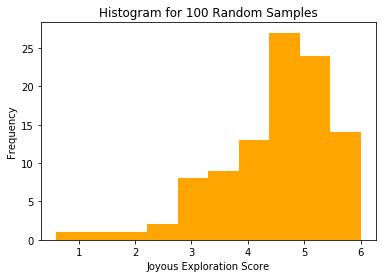

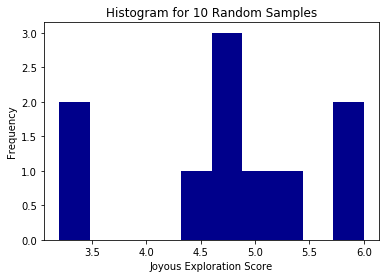

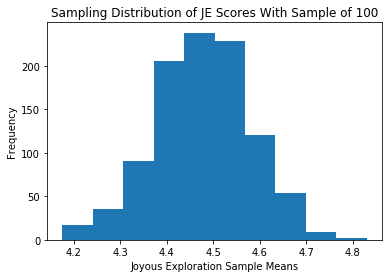

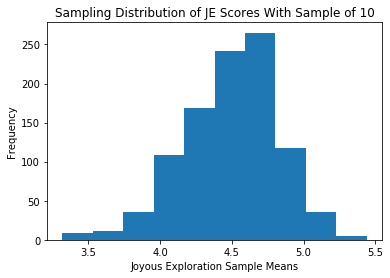

In [0]:
# chose to randomly sample from Joyous Exploration
JElist = df['JE_5D'].tolist()  
# creating random samplings of different sizes
random100 = random.sample(JElist, 100)
random10 = random.sample(JElist, 10)
# calculating standard deviations
standardDeviation100 = np.std(random100)
standardDeviation10 = np.std(random10)
print('Standard Deviation of Random Sample of 100: ', standardDeviation100)
print('Standard Deviation of Random Sample of 10: ', standardDeviation10)
# calculating standard errors of mean
SEm100 = (np.std(random100))/(np.sqrt(len(random100)))
SEm10 = (np.std(random10))/(np.sqrt(len(random10)))
print('Standard Error of Mean of Random Sample of 100: ', SEm100)
print('Standard Error of Mean of Random Sample of 10: ', SEm10)

pyplot.hist(random100, color = 'Orange')
pyplot.xlabel('Joyous Exploration Score')
pyplot.ylabel('Frequency')
pyplot.title('Histogram for 100 Random Samples')
pyplot.show()

pyplot.hist(random10, color = 'DarkBlue')
pyplot.xlabel('Joyous Exploration Score')
pyplot.ylabel('Frequency')
pyplot.title('Histogram for 10 Random Samples')
pyplot.show()

population100 = []

for n in range(0,1000):
    sample100 = np.random.choice(JElist, size=100)
    res100 = np.mean(sample100)
    res100 = population100.append(np.mean(sample100))
    # want to obtain distribution of differences of sample means to use with test statistic
    
pyplot.figure()
pyplot.hist(population100)
pyplot.xlabel('Joyous Exploration Sample Means')
pyplot.ylabel('Frequency')
pyplot.title('Sampling Distribution of JE Scores With Sample of 100')
pyplot.show()

population10 = []
for n in range(0,1000):
    sample10 = np.random.choice(JElist, size=10)
    res10 = np.mean(sample10)
    res10 = population10.append(np.mean(sample10))
    # want to obtain distribution of differences of sample means to use with test statistic
    
pyplot.figure()
pyplot.hist(population10)
pyplot.xlabel('Joyous Exploration Sample Means')
pyplot.ylabel('Frequency')
pyplot.title('Sampling Distribution of JE Scores With Sample of 10')
pyplot.show()

#### Essay Portion:

We can distinctly see in our sampling distributions that the sampling distribution with a larger random sample has a signficantly more uniform, unimodal, symmetric, and normal-like shape. When we look at the standard deviation, we see that the average value from a smaller sample varies further from the sample mean, and there is also a larger standard error of the mean. With a smaller sample size, we are allowing for imprecise data. Having a sufficient amount of subjects to analyze data is important to obtain accurate conclusions.

JCA:

+0.5 clearly labeled axes/title/legend: (+0.5), appropriate x ranges for last two plots (must show relative variation accurately, +0.5)

+4 histogram plotted (+1 each correct histogram)

+2 SEM/SD calculation (+0.5 for each measure and each number of samples)

+0.5 working code

+0.5 commented code 

+1 essay portion 


### Q10  The Error Bar

#### Data Science Portion:

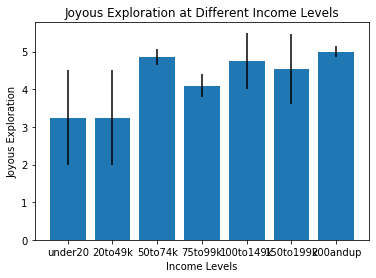

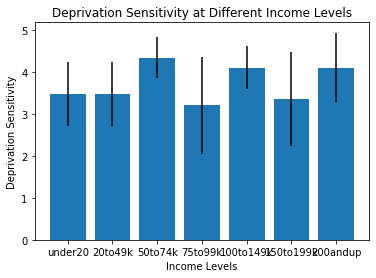

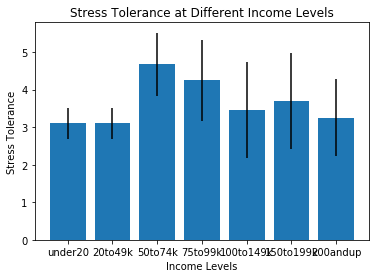

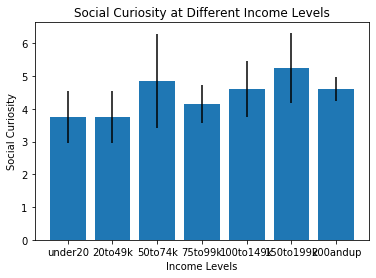

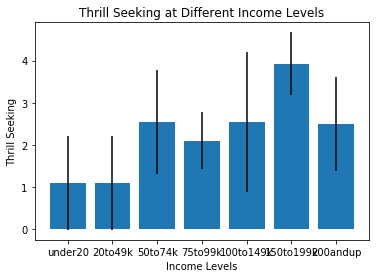

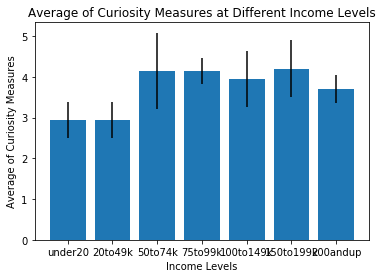

In [0]:
# CURIOSITY MEASURE: JOYOUS EXPLORATION

# display(df) # making sure that the original cleaned DataFrame was not affected

# Specific Income Levels
dfIncome1 = df.loc[(df['Income']==1)]
# display(dfIncome1)
JEincome1 = dfIncome1['JE_5D'].tolist()
randomJEincome1 = random.sample(JEincome1, 4)
meanJEincome1 = np.mean(randomJEincome1)
errorJE1 = 2*((np.std(randomJEincome1))/(np.sqrt(len(randomJEincome1))))

dfIncome2 = df.loc[(df['Income']==2)]
# display(dfIncome2)
JEincome2 = dfIncome1['JE_5D'].tolist()
randomJEincome2 = random.sample(JEincome2, 4)
meanJEincome2 = np.mean(randomJEincome2)
errorJE2 = 2*((np.std(randomJEincome2))/(np.sqrt(len(randomJEincome2))))

dfIncome3 = df.loc[(df['Income']==3)]
# display(dfIncome3)
JEincome3 = dfIncome3['JE_5D'].tolist()
randomJEincome3 = random.sample(JEincome3, 4)
meanJEincome3 = np.mean(randomJEincome3)
errorJE3 = 2*((np.std(randomJEincome3))/(np.sqrt(len(randomJEincome3))))

dfIncome4 = df.loc[(df['Income']==4)]
# display(dfIncome4)
JEincome4 = dfIncome4['JE_5D'].tolist()
randomJEincome4 = random.sample(JEincome4, 4)
meanJEincome4 = np.mean(randomJEincome4)
errorJE4 = 2*((np.std(randomJEincome4))/(np.sqrt(len(randomJEincome4))))

dfIncome5 = df.loc[(df['Income']==5)]
# display(dfIncome5)
JEincome5 = dfIncome5['JE_5D'].tolist()
randomJEincome5 = random.sample(JEincome5, 4)
meanJEincome5 = np.mean(randomJEincome5)
errorJE5 = 2*((np.std(randomJEincome5))/(np.sqrt(len(randomJEincome5))))

dfIncome6 = df.loc[(df['Income']==6)]
# display(dfIncome6)
JEincome6 = dfIncome6['JE_5D'].tolist()
randomJEincome6 = random.sample(JEincome6, 4)
meanJEincome6 = np.mean(randomJEincome6)
errorJE6 = 2*((np.std(randomJEincome6))/(np.sqrt(len(randomJEincome6))))

dfIncome7 = df.loc[(df['Income']==7)]
# display(dfIncome7)
JEincome7 = dfIncome7['JE_5D'].tolist()
randomJEincome7 = random.sample(JEincome7, 4)
meanJEincome7 = np.mean(randomJEincome7)
errorJE7 = 2*((np.std(randomJEincome7))/(np.sqrt(len(randomJEincome7))))

# gathering data for bar plot
xJE = ['under20', '20to49k', '50to74k', '75to99k', '100to149k', '150to199k', '200andup']
hJE = [meanJEincome1, meanJEincome2, meanJEincome3, meanJEincome4, meanJEincome5, meanJEincome6, meanJEincome7]
errors = [errorJE1, errorJE2, errorJE3, errorJE4, errorJE5, errorJE6, errorJE7]

pyplot.bar(xJE, hJE, width=0.8, yerr = errors, bottom=None, align='center', data=None)
pyplot.xlabel('Income Levels')
pyplot.ylabel('Joyous Exploration')
pyplot.title('Joyous Exploration at Different Income Levels')
pyplot.show()

# CURIOSITY MEASURE: DEPRIVATION SENSITIVITY

# display(df) # making sure that the original cleaned DataFrame was not affected

# Specific Income Levels
dfIncome1 = df.loc[(df['Income']==1)]
# display(dfIncome1)
DSincome1 = dfIncome1['DS_5D'].tolist()
randomDSincome1 = random.sample(DSincome1, 4)
meanDSincome1 = np.mean(randomDSincome1)
errorDS1 = 2*((np.std(randomDSincome1))/(np.sqrt(len(randomDSincome1))))

dfIncome2 = df.loc[(df['Income']==2)]
# display(dfIncome2)
DSincome2 = dfIncome1['DS_5D'].tolist()
randomDSincome2 = random.sample(DSincome2, 4)
meanDSincome2 = np.mean(randomDSincome2)
errorDS2 = 2*((np.std(randomDSincome2))/(np.sqrt(len(randomDSincome2))))

dfIncome3 = df.loc[(df['Income']==3)]
# display(dfIncome3)
DSincome3 = dfIncome3['DS_5D'].tolist()
randomDSincome3 = random.sample(DSincome3, 4)
meanDSincome3 = np.mean(randomDSincome3)
errorDS3 = 2*((np.std(randomDSincome3))/(np.sqrt(len(randomDSincome3))))

dfIncome4 = df.loc[(df['Income']==4)]
# display(dfIncome4)
DSincome4 = dfIncome4['DS_5D'].tolist()
randomDSincome4 = random.sample(DSincome4, 4)
meanDSincome4 = np.mean(randomDSincome4)
errorDS4 = 2*((np.std(randomDSincome4))/(np.sqrt(len(randomDSincome4))))

dfIncome5 = df.loc[(df['Income']==5)]
# display(dfIncome5)
DSincome5 = dfIncome5['DS_5D'].tolist()
randomDSincome5 = random.sample(DSincome5, 4)
meanDSincome5 = np.mean(randomDSincome5)
errorDS5 = 2*((np.std(randomDSincome5))/(np.sqrt(len(randomDSincome5))))

dfIncome6 = df.loc[(df['Income']==6)]
# display(dfIncome6)
DSincome6 = dfIncome6['DS_5D'].tolist()
randomDSincome6 = random.sample(DSincome6, 4)
meanDSincome6 = np.mean(randomDSincome6)
errorDS6 = 2*((np.std(randomDSincome6))/(np.sqrt(len(randomDSincome6))))

dfIncome7 = df.loc[(df['Income']==7)]
# display(dfIncome7)
DSincome7 = dfIncome7['DS_5D'].tolist()
randomDSincome7 = random.sample(DSincome7, 4)
meanDSincome7 = np.mean(randomDSincome7)
errorDS7 = 2*((np.std(randomDSincome7))/(np.sqrt(len(randomDSincome7))))

# gathering data for bar plot
xDS = ['under20', '20to49k', '50to74k', '75to99k', '100to149k', '150to199k', '200andup']
hDS = [meanDSincome1, meanDSincome2, meanDSincome3, meanDSincome4, meanDSincome5, meanDSincome6, meanDSincome7]
errors = [errorDS1, errorDS2, errorDS3, errorDS4, errorDS5, errorDS6, errorDS7]

pyplot.bar(xDS, hDS, width=0.8, yerr = errors, bottom=None, align='center', data=None)
pyplot.xlabel('Income Levels')
pyplot.ylabel('Deprivation Sensitivity')
pyplot.title('Deprivation Sensitivity at Different Income Levels')
pyplot.show()

# CURIOSITY MEASURE: STRESS TOLERANCE

# display(df) # making sure that the original cleaned DataFrame was not affected

# Specific Income Levels
dfIncome1 = df.loc[(df['Income']==1)]
# display(dfIncome1)
STincome1 = dfIncome1['ST_5D_R'].tolist()
randomSTincome1 = random.sample(STincome1, 4)
meanSTincome1 = np.mean(randomSTincome1)
errorST1 = 2*((np.std(randomSTincome1))/(np.sqrt(len(randomSTincome1))))

dfIncome2 = df.loc[(df['Income']==2)]
# display(dfIncome2)
STincome2 = dfIncome1['ST_5D_R'].tolist()
randomSTincome2 = random.sample(STincome2, 4)
meanSTincome2 = np.mean(randomSTincome2)
errorST2 = 2*((np.std(randomSTincome2))/(np.sqrt(len(randomSTincome2))))

dfIncome3 = df.loc[(df['Income']==3)]
# display(dfIncome3)
STincome3 = dfIncome3['ST_5D_R'].tolist()
randomSTincome3 = random.sample(STincome3, 4)
meanSTincome3 = np.mean(randomSTincome3)
errorST3 = 2*((np.std(randomSTincome3))/(np.sqrt(len(randomSTincome3))))

dfIncome4 = df.loc[(df['Income']==4)]
# display(dfIncome4)
STincome4 = dfIncome4['ST_5D_R'].tolist()
randomSTincome4 = random.sample(STincome4, 4)
meanSTincome4 = np.mean(randomSTincome4)
errorST4 = 2*((np.std(randomSTincome4))/(np.sqrt(len(randomSTincome4))))

dfIncome5 = df.loc[(df['Income']==5)]
# display(dfIncome5)
STincome5 = dfIncome5['ST_5D_R'].tolist()
randomSTincome5 = random.sample(STincome5, 4)
meanSTincome5 = np.mean(randomSTincome5)
errorST5 = 2*((np.std(randomSTincome5))/(np.sqrt(len(randomSTincome5))))

dfIncome6 = df.loc[(df['Income']==6)]
# display(dfIncome6)
STincome6 = dfIncome6['ST_5D_R'].tolist()
randomSTincome6 = random.sample(STincome6, 4)
meanSTincome6 = np.mean(randomSTincome6)
errorST6 = 2*((np.std(randomSTincome6))/(np.sqrt(len(randomSTincome6))))

dfIncome7 = df.loc[(df['Income']==7)]
# display(dfIncome7)
STincome7 = dfIncome7['ST_5D_R'].tolist()
randomSTincome7 = random.sample(STincome7, 4)
meanSTincome7 = np.mean(randomSTincome7)
errorST7 = 2*((np.std(randomSTincome7))/(np.sqrt(len(randomSTincome7))))

# gathering data for bar plot
xST = ['under20', '20to49k', '50to74k', '75to99k', '100to149k', '150to199k', '200andup']
hST = [meanSTincome1, meanSTincome2, meanSTincome3, meanSTincome4, meanSTincome5, meanSTincome6, meanSTincome7]
errors = [errorST1, errorST2, errorST3, errorST4, errorST5, errorST6, errorST7]

pyplot.bar(xST, hST, width=0.8, yerr = errors, bottom=None, align='center', data=None)
pyplot.xlabel('Income Levels')
pyplot.ylabel('Stress Tolerance')
pyplot.title('Stress Tolerance at Different Income Levels')
pyplot.show()

# CURIOSITY MEASURE: SOCIAL CURIOSITY

# display(df) # making sure that the original cleaned DataFrame was not affected

# Specific Income Levels
dfIncome1 = df.loc[(df['Income']==1)]
# display(dfIncome1)
SCincome1 = dfIncome1['SC_5D'].tolist()
randomSCincome1 = random.sample(SCincome1, 4)
meanSCincome1 = np.mean(randomSCincome1)
errorSC1 = 2*((np.std(randomSCincome1))/(np.sqrt(len(randomSCincome1))))

dfIncome2 = df.loc[(df['Income']==2)]
# display(dfIncome2)
SCincome2 = dfIncome1['SC_5D'].tolist()
randomSCincome2 = random.sample(SCincome2, 4)
meanSCincome2 = np.mean(randomSCincome2)
errorSC2 = 2*((np.std(randomSCincome2))/(np.sqrt(len(randomSCincome2))))

dfIncome3 = df.loc[(df['Income']==3)]
# display(dfIncome3)
SCincome3 = dfIncome3['SC_5D'].tolist()
randomSCincome3 = random.sample(SCincome3, 4)
meanSCincome3 = np.mean(randomSCincome3)
errorSC3 = 2*((np.std(randomSCincome3))/(np.sqrt(len(randomSCincome3))))

dfIncome4 = df.loc[(df['Income']==4)]
# display(dfIncome4)
SCincome4 = dfIncome4['SC_5D'].tolist()
randomSCincome4 = random.sample(SCincome4, 4)
meanSCincome4 = np.mean(randomSCincome4)
errorSC4 = 2*((np.std(randomSCincome4))/(np.sqrt(len(randomSCincome4))))

dfIncome5 = df.loc[(df['Income']==5)]
# display(dfIncome5)
SCincome5 = dfIncome5['SC_5D'].tolist()
randomSCincome5 = random.sample(SCincome5, 4)
meanSCincome5 = np.mean(randomSCincome5)
errorSC5 = 2*((np.std(randomSCincome5))/(np.sqrt(len(randomSCincome5))))

dfIncome6 = df.loc[(df['Income']==6)]
# display(dfIncome6)
SCincome6 = dfIncome6['SC_5D'].tolist()
randomSCincome6 = random.sample(SCincome6, 4)
meanSCincome6 = np.mean(randomSCincome6)
errorSC6 = 2*((np.std(randomSCincome6))/(np.sqrt(len(randomSCincome6))))

dfIncome7 = df.loc[(df['Income']==7)]
# display(dfIncome7)
SCincome7 = dfIncome7['SC_5D'].tolist()
randomSCincome7 = random.sample(SCincome7, 4)
meanSCincome7 = np.mean(randomSCincome7)
errorSC7 = 2*((np.std(randomSCincome7))/(np.sqrt(len(randomSCincome7))))

# gathering data for bar plot
xSC = ['under20', '20to49k', '50to74k', '75to99k', '100to149k', '150to199k', '200andup']
hSC = [meanSCincome1, meanSCincome2, meanSCincome3, meanSCincome4, meanSCincome5, meanSCincome6, meanSCincome7]
errors = [errorSC1, errorSC2, errorSC3, errorSC4, errorSC5, errorSC6, errorSC7]

pyplot.bar(xSC, hSC, width=0.8, yerr = errors, bottom=None, align='center', data=None)
pyplot.xlabel('Income Levels')
pyplot.ylabel('Social Curiosity')
pyplot.title('Social Curiosity at Different Income Levels')
pyplot.show()

# CURIOSITY MEASURE: THRILL SEEKING

# display(df) # making sure that the original cleaned DataFrame was not affected

# Specific Income Levels
dfIncome1 = df.loc[(df['Income']==1)]
# display(dfIncome1)
TSincome1 = dfIncome1['TS_5D'].tolist()
randomTSincome1 = random.sample(TSincome1, 4)
meanTSincome1 = np.mean(randomTSincome1)
errorTS1 = 2*((np.std(randomTSincome1))/(np.sqrt(len(randomTSincome1))))

dfIncome2 = df.loc[(df['Income']==2)]
# display(dfIncome2)
TSincome2 = dfIncome1['TS_5D'].tolist()
randomTSincome2 = random.sample(TSincome2, 4)
meanTSincome2 = np.mean(randomTSincome2)
errorTS2 = 2*((np.std(randomTSincome2))/(np.sqrt(len(randomTSincome2))))

dfIncome3 = df.loc[(df['Income']==3)]
# display(dfIncome3)
TSincome3 = dfIncome3['TS_5D'].tolist()
randomTSincome3 = random.sample(TSincome3, 4)
meanTSincome3 = np.mean(randomTSincome3)
errorTS3 = 2*((np.std(randomTSincome3))/(np.sqrt(len(randomTSincome3))))

dfIncome4 = df.loc[(df['Income']==4)]
# display(dfIncome4)
TSincome4 = dfIncome4['TS_5D'].tolist()
randomTSincome4 = random.sample(TSincome4, 4)
meanTSincome4 = np.mean(randomTSincome4)
errorTS4 = 2*((np.std(randomTSincome4))/(np.sqrt(len(randomTSincome4))))

dfIncome5 = df.loc[(df['Income']==5)]
# display(dfIncome5)
TSincome5 = dfIncome5['TS_5D'].tolist()
randomTSincome5 = random.sample(TSincome5, 4)
meanTSincome5 = np.mean(randomTSincome5)
errorTS5 = 2*((np.std(randomTSincome5))/(np.sqrt(len(randomTSincome5))))

dfIncome6 = df.loc[(df['Income']==6)]
# display(dfIncome6)
TSincome6 = dfIncome6['TS_5D'].tolist()
randomTSincome6 = random.sample(TSincome6, 4)
meanTSincome6 = np.mean(randomTSincome6)
errorTS6 = 2*((np.std(randomTSincome6))/(np.sqrt(len(randomTSincome6))))

dfIncome7 = df.loc[(df['Income']==7)]
# display(dfIncome7)
TSincome7 = dfIncome7['TS_5D'].tolist()
randomTSincome7 = random.sample(TSincome7, 4)
meanTSincome7 = np.mean(randomTSincome7)
errorTS7 = 2*((np.std(randomTSincome7))/(np.sqrt(len(randomTSincome7))))

# gathering data for bar plot
xTS = ['under20', '20to49k', '50to74k', '75to99k', '100to149k', '150to199k', '200andup']
hTS = [meanTSincome1, meanTSincome2, meanTSincome3, meanTSincome4, meanTSincome5, meanTSincome6, meanTSincome7]
errors = [errorTS1, errorTS2, errorTS3, errorTS4, errorTS5, errorTS6, errorTS7]

pyplot.bar(xTS, hTS, width=0.8, yerr = errors, bottom=None, align='center', data=None)
pyplot.xlabel('Income Levels')
pyplot.ylabel('Thrill Seeking')
pyplot.title('Thrill Seeking at Different Income Levels')
pyplot.show()

# CURIOSITY MEASURE: AVERAGE OF CURIOSITY MEASURES

# display(df) # making sure that the original cleaned DataFrame was not affected

# Specific Income Levels
dfIncome1 = df.loc[(df['Income']==1)]
# display(dfIncome1)
AVGincome1 = dfIncome1['Avg_5D'].tolist()
randomAVGincome1 = random.sample(AVGincome1, 4)
meanAVGincome1 = np.mean(randomAVGincome1)
errorAVG1 = 2*((np.std(randomAVGincome1))/(np.sqrt(len(randomAVGincome1))))

dfIncome2 = df.loc[(df['Income']==2)]
# display(dfIncome2)
AVGincome2 = dfIncome1['Avg_5D'].tolist()
randomAVGincome2 = random.sample(AVGincome2, 4)
meanAVGincome2 = np.mean(randomAVGincome2)
errorAVG2 = 2*((np.std(randomAVGincome2))/(np.sqrt(len(randomAVGincome2))))

dfIncome3 = df.loc[(df['Income']==3)]
# display(dfIncome3)
AVGincome3 = dfIncome3['Avg_5D'].tolist()
randomAVGincome3 = random.sample(AVGincome3, 4)
meanAVGincome3 = np.mean(randomAVGincome3)
errorAVG3 = 2*((np.std(randomAVGincome3))/(np.sqrt(len(randomAVGincome3))))

dfIncome4 = df.loc[(df['Income']==4)]
# display(dfIncome4)
AVGincome4 = dfIncome4['Avg_5D'].tolist()
randomAVGincome4 = random.sample(AVGincome4, 4)
meanAVGincome4 = np.mean(randomAVGincome4)
errorAVG4 = 2*((np.std(randomAVGincome4))/(np.sqrt(len(randomAVGincome4))))

dfIncome5 = df.loc[(df['Income']==5)]
# display(dfIncome5)
AVGincome5 = dfIncome5['Avg_5D'].tolist()
randomAVGincome5 = random.sample(AVGincome5, 4)
meanAVGincome5 = np.mean(randomAVGincome5)
errorAVG5 = 2*((np.std(randomAVGincome5))/(np.sqrt(len(randomAVGincome5))))

dfIncome6 = df.loc[(df['Income']==6)]
# display(dfIncome6)
AVGincome6 = dfIncome6['Avg_5D'].tolist()
randomAVGincome6 = random.sample(AVGincome6, 4)
meanAVGincome6 = np.mean(randomAVGincome6)
errorAVG6 = 2*((np.std(randomAVGincome6))/(np.sqrt(len(randomAVGincome6))))

dfIncome7 = df.loc[(df['Income']==7)]
# display(dfIncome7)
AVGincome7 = dfIncome7['Avg_5D'].tolist()
randomAVGincome7 = random.sample(AVGincome7, 4)
meanAVGincome7 = np.mean(randomAVGincome7)
errorAVG7 = 2*((np.std(randomAVGincome7))/(np.sqrt(len(randomAVGincome7))))

# gathering data for bar plot
xAVG = ['under20', '20to49k', '50to74k', '75to99k', '100to149k', '150to199k', '200andup']
hAVG = [meanAVGincome1, meanAVGincome2, meanAVGincome3, meanAVGincome4, meanAVGincome5, meanAVGincome6, meanAVGincome7]
errors = [errorAVG1, errorAVG2, errorAVG3, errorAVG4, errorAVG5, errorAVG6, errorAVG7]

pyplot.bar(xAVG, hAVG, width=0.8, yerr = errors, bottom=None, align='center', data=None)
pyplot.xlabel('Income Levels')
pyplot.ylabel('Average of Curiosity Measures')
pyplot.title('Average of Curiosity Measures at Different Income Levels')
pyplot.show()


#### Essay Portion:

For the error bars in the bar plots for this problem, I chose error bars which were each 2 standard errors of the mean above and below the mean. This offers us a 95% confidence interval, which is an interval that we can say with 95% confidence contains the population mean. The Average of Curiosity Measures do seem to follow a trend with income level. However, this is a bit harder to see with individual curiosity measures.

SS:

+1 correct choice of plot (be open to other choices but must include error bars)

+2 bar graphs plotted

+1 correct error bars

+1 clearly labeled axes/title/legend

+1 explain what error bars show correctly
  - 95% CI is 1.96SE

+0.5 working code

+0.5 commented code 

+1 reasonable observation about measures vs. income level

### Q11  Hypothesis Testing

#### Data Science Portion:

In [0]:
# Null Hypothesis: There is no difference between the distribution of individuals in each income level for Joyous Exploration and for Social Curiosity.
# Calculating Chi-Squared Test Statistic
JEdatalist = list(df['JE_5D'])
SCdatalist = list(df['SC_5D'])

# preallocating empty lists
flooredJEdata = []
flooredSCdata = []

# for loop to arrange through data sets
for n in range(len(JEdatalist)):
    JEdataFloor=math.floor(JEdatalist[n])
    flooredJEdata.append(JEdataFloor)
    
    sSCdataFloor=math.floor(SCdatalist[n])
    flooredSCdata.append(sSCdataFloor)
    
joy0=JEdatalist.count(0)
joy1=JEdatalist.count(1)
joy2=JEdatalist.count(2)
joy3=JEdatalist.count(3)
joy4=JEdatalist.count(4)
joy5=JEdatalist.count(5)
joy6=JEdatalist.count(6)

JECount= [joy0,joy1,joy2,joy3,joy4,joy5,joy6]

soc0=SCdatalist.count(0)
soc1=SCdatalist.count(1)
soc2=SCdatalist.count(2)
soc3=SCdatalist.count(3)
soc4=SCdatalist.count(4)
soc5=SCdatalist.count(5)
soc6=SCdatalist.count(6)

SCCount=[soc0,soc1,soc2,soc3,soc4,soc5,soc6]

# print(joyCount)
# print(socCount)

# calculating the test statistic
chisquare(JECount, f_exp=SCCount, ddof=5)

Power_divergenceResult(statistic=12.351370851370852, pvalue=0.00044066277627185444)

#### Essay Portion:

I used the chi-squared test statistic because it measures how well observed data may fit the null distribution of an expected data set. It fits our null hypothesis well in this way. I chose to use a significance level of 0.05, used commonly in statistical settings. The significance level refers to the risk of incorrectly concluding that some difference exists from our null hypothesis. This would mean that using our hypothesis test, we run a 5% chance of incorrectly making a conclusion. Despite this, our conclusion is that there is a difference between the distributions of Joyous Exploration and Social Curiosity in regards to the income levels, which is a rejection of our null hypothesis.

SS:

+1 discretize JE and SC

+1 null & alt hypothesis stated (+0.5 each) either in code or essay

+1 calculated test statistic 
  - ddof is not correct. so those results is actually not corret. I didn't take off point here though.

+1 p value

+0.5 working code

+0.5 commented code 

+1 choice of statistical test and reasoning

+1 choice of significance level and explanation of its meaning

+1 interpret the result on curiosity study


## 5  Network Analysis

### Q12  Network Statistics

#### Data Science Portion:

C:\Users\aprup\Anaconda3\lib\site-packages\bct\algorithms\distance.py:155: RuntimeWarning: divide by zero encountered in true_divide
  efficiency = np.mean(1 / Dv)


[(-0.5, 0.5)]

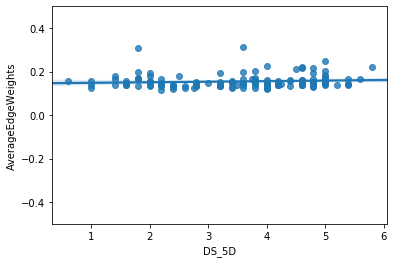

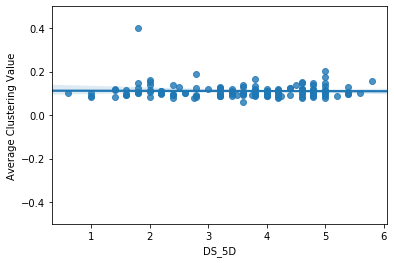

In [0]:
cleaned = df["ID"]
cleanedStr = [str(int) for int in cleaned]
compiledSet = []

# directory of python file and data files
basedir = r"C:/Users/aprup/Documents/Classes - Spring 2020/ENM 375/Midterm Project/"
folders = os.listdir("KNOTData_processed")
fold = "KNOTData_processed/"
specific = "/PossibleNetwork.txt"

for subjectID in cleanedStr:
    subjectNetwork = np.loadtxt(basedir + fold + subjectID + specific)
    compiledSet.append(subjectNetwork) 

# preallocating lists
G = []
edgeWeightsMean = []
averageClusteringValue = []
averageShortestPathLengthValue = []

for i in range(len(compiledSet)): 
    piece = compiledSet[i]
# Create networkx graph from numpy array adj
    G = nx.from_numpy_array(piece, parallel_edges = False)

# Get the edge weights from the graph G
    edgeWeights = np.array([d['weight'] for u,v,d in G.edges(data = True)])
    edgeWeightsMean.append(np.mean(edgeWeights[edgeWeights>0]))

# edge weights are now recorded as an array
# computing the average clustering coefficient of a graph G with nx.average_clustering
    averageClusteringValue.append(nx.average_clustering(G, weight = 'weight'))

    # obtaining the average shortest path length
    out = (bct.charpath(piece))
    averageShortestPathLengthValue.append(out[0])
#averageShortestPathLengthValue = nx.averageShortestPathLength(G, weight = 'weight')

df['AverageEdgeWeights'] = edgeWeightsMean
df['Average Clustering Value'] = averageClusteringValue
df['Average Shortest Length'] = averageShortestPathLengthValue

pyplot.figure()
out1 = sns.regplot(x = df['DS_5D'], y = df['AverageEdgeWeights'])
out1.set(ylim = (-.5,.5))

pyplot.figure()
out = sns.regplot(x = df['DS_5D'], y = df['Average Clustering Value'])
out.set(ylim = (-0.5,0.5))

# print(df)

#### Essay Portion:

In my data, the network statistics depicts the average clustering values for each observed subject. From the resulting scatterplots, I can see that the Average Edge Weights follow trends with the Average Clustering Value. 

SS:

+2 working code/calculation (they will not lose points if they just make mistakes in computing network statistics)

+1.5 scatter/regplot graph plotted (even if potentially incorrect values)
  - no plot for average shortest path length

+1 clearly labeled axes/title/legend, appropriate x/y limits to see the tendency (+0.5 for each)

+0 not describe what those statistics might mean in the data

+1 observation from the plots

### Q13  Probability

#### Data Science Portion:

In [0]:
busybodyLike = df[df.AverageEdgeWeights <= np.quantile(df['AverageEdgeWeights'], .25)]
hunterLike = df[df.AverageEdgeWeights >= np.quantile(df['AverageEdgeWeights'], .75)]

# counting numbers of individuals following behaviors
Hunters = len(hunterLike)
Busybodys = len(busybodyLike)

hunterGreaterJE = len(hunterLike[hunterLike.JE_5D >= 4])/Hunters
hunterGreaterST = len(hunterLike[hunterLike.ST_5D_R >= 4])/Hunters
hunterGreaterDS = len(hunterLike[hunterLike.DS_5D >= 4])/Hunters

busybodyGreaterJE = len(busybodyLike[busybodyLike.JE_5D >= 4])/Busybodys
busybodyGreaterST = len(busybodyLike[busybodyLike.ST_5D_R >= 4])/Busybodys
busybodyGreaterDS = len(busybodyLike[busybodyLike.DS_5D >= 4])/Busybodys

# printing wanted values
print(hunterGreaterJE, hunterGreaterDS, hunterGreaterST, busybodyGreaterJE, busybodyGreaterDS, busybodyGreaterST)

0.7142857142857143 0.4857142857142857 0.45714285714285713 0.6285714285714286 0.3142857142857143 0.45714285714285713


#### Essay Portion:

Our results show that the probability of each information seeking behavioral individual:

(i) have joyous exploration measure greater than or equal to 4: Busybody = 0.6285714285714286, Hunter = 0.7142857142857143

(ii) have deprivation sensitivity measure greater than or equal to 4: Busybody = 0.3142857142857143, Hunter = 0.4857142857142857

(iii) have stress tolerance measure greater than or equal to 4: Busybody = 0.45714285714285713, Hunter = 0.45714285714285713

We came to this estimate by separating Hunters and Busybodies based on the given data, then taking a count o f the curiosity measures of joyous exploration, deprivation sensitivity, and stress tolerance for each of the two individual behavior types. We then used these counts and the total counts to achieve the probabilities for each event. In order to come to a better estimate, we could use greater numbers of subjects to achieve more representative samples of Busybodies and Hunters.

SS:

+3 calculate probability (+1 for each) - don’t penalize if Q12 is wrong; no double jeopardy

+1 neatly reported events 

+1 indicate conditional probability

+1 reasoning/argument for better estimate

+0.5 working code

+0.5 commented code 

### Q14  Hypothesis Testing

#### Data Science Portion:

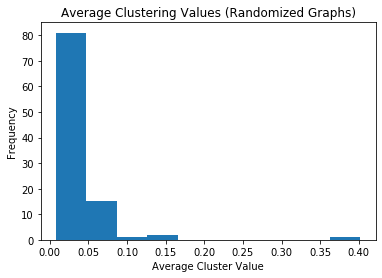

Power_divergenceResult(statistic=1.8763832323984164, pvalue=0.9999999995906853)

In [0]:
store = []
for j in range(100):
    adjRandomized = bct.randmio_und(compiledSet[j], 4)[0]
    GRandomized = nx.from_numpy_array(adjRandomized, parallel_edges = False)
    store.append(nx.average_clustering(GRandomized, weight = 'weight'))

pyplot.hist(store)
pyplot.title("Average Clustering Values (Randomized Graphs)")
pyplot.ylabel("Frequency")
pyplot.xlabel("Average Cluster Value")
pyplot.show()

hunterLike = df[df.AverageEdgeWeights >= np.quantile(df['AverageEdgeWeights'], .75)]
logic = (store >= np.quantile(store, .75))
store = np.array([store])

# obtaining outputs
out = np.multiply(logic, store)
out = np.array(out)
out = out[out>0]

# print(out)
dimension = len(out)
# print(dimension)

sampleRandList = df['AverageEdgeWeights'].tolist()
sampleRand = random.choices(sampleRandList, k = len(out))
# retrieving chi-squared test statistic
chisquare(out, f_exp=sampleRand, ddof=0, axis=0)

#### Essay Portion:

Test Statistic: 1.8501309346487806

Null Hypothesis: The hunter-like portion of our randomized data is the same as the network data we obtained earlier in the project.

Alternative Hypothesis: The hunter-like portion of our randomized data is different from the network data we obtained earlier in the project.

I chose to use the Chi-Squared test statistic because it measures how well observed data may fit the null distribution of an expected data set. It fits our null hypothesis well in this way.

P-Value = 0.999999999650166

For my study, the results may mean that because the P-value of 0.999999999650166 is not less than 0.05 (significance level), we fail to reject the null hypothesis and therefore cannot assume the alternative hypothesis that the hunter-like portion of our randomized data is different from the network data we obtained earlier in the project.

SS:

+2 generate random graphs and calculate average cc

+1 draw histogram

+1 clearly labeled axes/title/legend

+1 null & alt hypothesis stated (+0.5 each)

+0 not appropriate choice of test statistics and reasoning
  - I just take off point here but give you the remaining points for your effort.

+1 calculated test statistic 

+1 p value

+1 interpretation of the results

+0.5 working code

+0.5 commented code

Nice work!